# Titanic Disaster - Machine Learning Project

# Importing Libraries

In [74]:
import numpy as np
import pandas as pd

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# The Data

In [77]:
train = pd.read_csv("titanic_train.csv")

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [80]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis (EDA)

## Missing Data

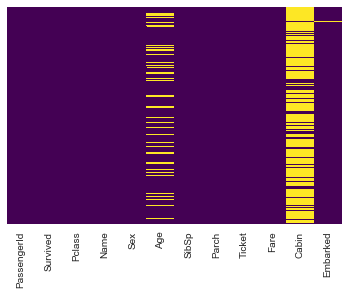

In [81]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [82]:
sns.set_style('whitegrid')

## Survived People

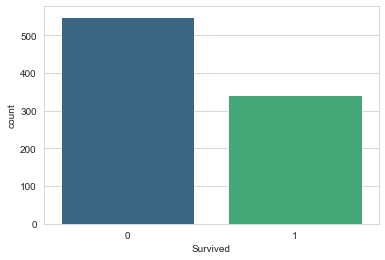

In [83]:
sns.countplot(x='Survived', data=train, palette='viridis')

#### Survived People by Sex

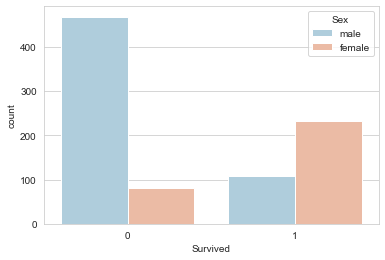

In [84]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

#### Survived People by Passenger Class

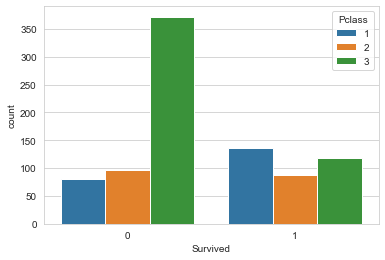

In [85]:
sns.countplot(x='Survived', data=train, hue='Pclass')

## Age of People

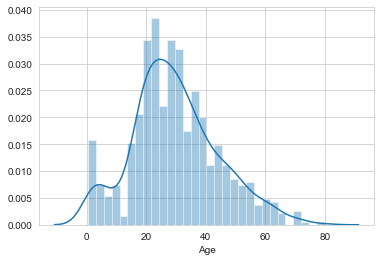

In [86]:
sns.distplot(train['Age'].dropna(), bins=30)

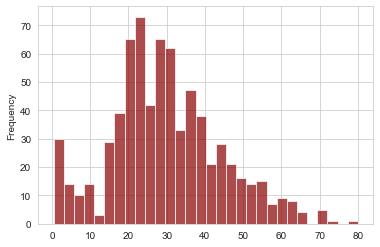

In [87]:
train['Age'].plot.hist(bins=30, color='darkred',alpha=0.7)

## Number of Siblings or Spouses on Board

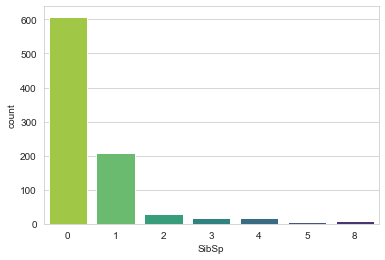

In [88]:
sns.countplot(x='SibSp', data=train, palette='viridis_r')

## Fare Paid by Passengers

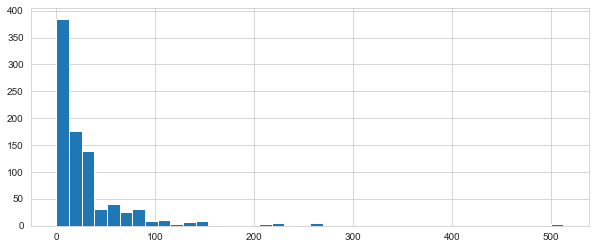

In [89]:
train['Fare'].hist(bins=40, figsize=(10, 4))

## Data Cleaning on Train Data

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Age Data

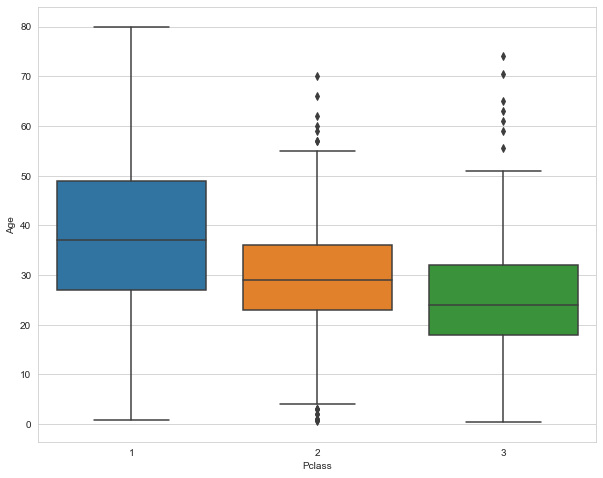

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=train)

#### Average Age for Each Class

In [92]:
for i in range(1, 3+1):
    g = train[(train['Pclass'] == i)]['Age'].dropna()
    guess = g.median()
    print("Class {}: {}".format(i, guess))

Class 1: 37.0
Class 2: 29.0
Class 3: 24.0


In [93]:
def impute_age_train(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [94]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age_train, axis=1)

#### Check Train DataFrame

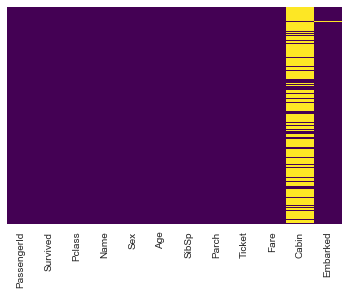

In [95]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Cabin Data

In [96]:
train.drop('Cabin', axis=1, inplace=True)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


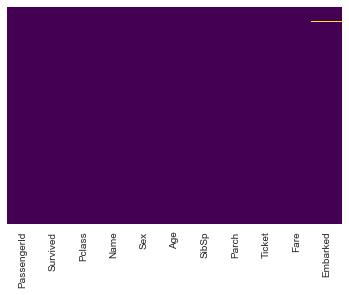

In [98]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Clean All Null Data

In [99]:
train.dropna(inplace=True)

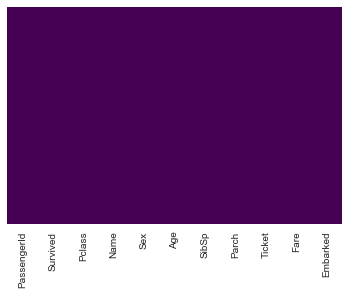

In [100]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [102]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [103]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [104]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [105]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [106]:
train = pd.concat([train, sex, embark], axis=1)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [108]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [109]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Data Cleaning on Test Data

In [110]:
test = pd.read_csv("titanic_test.csv")

In [111]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [113]:
for i in range(1, 3+1):
    g = test[(test['Pclass'] == i)]['Age'].dropna()
    guess = g.median()
    print("Class {}: {}".format(i, guess))

Class 1: 42.0
Class 2: 26.5
Class 3: 24.0


In [114]:
def impute_age_test(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 24
    
    else:
        return Age

In [115]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_test, axis=1)
test.drop('Cabin', axis=1, inplace=True)

In [116]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [117]:
test = pd.concat([test, sex_test, embark_test], axis=1)

In [118]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [119]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


## Test Survived Data

In [120]:
test_survived = pd.read_csv("titanic_test_survived.csv")
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [122]:
average_fare = test['Fare'].mean()

In [123]:
test['Fare'].fillna(average_fare, inplace=True)

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [125]:
test_survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


# Building Model

## Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [128]:
X_test = test
y_test = test_survived['Survived']

## Training and Prediction

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logistic_model = LogisticRegression()

In [131]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
predictions = logistic_model.predict(X_test)

## Model Evaluation

### Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
cm = confusion_matrix(y_test,predictions)
cm

array([[257,   9],
       [  8, 144]], dtype=int64)

### Classification Report

In [135]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



**Our model is almost 96.00% accurate on test data.**